<a href="https://colab.research.google.com/github/Kostya-meow/PIS_colab/blob/main/PIS_10_03_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  import packages

In [60]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


# Data

In [13]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data", header=None)

data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [14]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class']
data.columns = names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [15]:
data['Class'].replace({1:'building_windows_float',
                     2:'building_windows_non_float',
                     3:'vehicle_windows_float',
                     4:'vehicle_windows_non_float',
                     5:'containers',
                     6:'tableware',
                     7:'headlamps'}, inplace=True)
data['Class'].value_counts()

building_windows_non_float    76
building_windows_float        70
headlamps                     29
vehicle_windows_float         17
containers                    13
tableware                      9
Name: Class, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [17]:
for col in data.columns:
    fr = np.random.randint(5,10)/100
    data.loc[data.sample(frac=fr).index,col] = np.nan

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      195 non-null    float64
 2   Mg      203 non-null    float64
 3   Al      195 non-null    float64
 4   Si      197 non-null    float64
 5   K       203 non-null    float64
 6   Ca      197 non-null    float64
 7   Ba      203 non-null    float64
 8   Fe      197 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


# Data Vizual

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      197 non-null    float64
 1   Na      195 non-null    float64
 2   Mg      203 non-null    float64
 3   Al      195 non-null    float64
 4   Si      197 non-null    float64
 5   K       203 non-null    float64
 6   Ca      197 non-null    float64
 7   Ba      203 non-null    float64
 8   Fe      197 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [20]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,197.000000,195.000000,203.000000,195.000000,197.000000,203.000000,197.000000,203.000000,197.000000
mean,1.518337,13.436308,2.668424,1.443795,72.658782,0.499113,8.973858,0.181527,0.052843
std,0.003105,0.808794,1.459560,0.488603,0.769749,0.667345,1.437940,0.508128,0.090835
min,1.511150,10.730000,0.000000,0.340000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516510,12.930000,1.865000,1.190000,72.280000,0.125000,8.240000,0.000000,0.000000
50%,1.517640,13.340000,3.480000,1.370000,72.790000,0.550000,8.610000,0.000000,0.000000
75%,1.519090,13.875000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.090000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.370000


In [21]:
print('-------------------------------------')
display(data['Class'].describe())
print('-------------------------------------')
display(data['Class'].value_counts())

-------------------------------------


count                            203
unique                             6
top       building_windows_non_float
freq                              75
Name: Class, dtype: object

-------------------------------------


building_windows_non_float    75
building_windows_float        65
headlamps                     27
vehicle_windows_float         16
containers                    12
tableware                      8
Name: Class, dtype: int64

In [31]:
missing = data['Al'].isna().sum()
percentage = 100*missing / len(data['Al'])

print(percentage)

8.878504672897197


In [39]:
missing = data['Al'].isna().sum()
percentage = 100*missing / len(data['Al'])

print(percentage)

5.140186915887851


In [36]:
for col in data.columns:
  missing = data[col].isna().sum()
  percentage = 100*missing / len(data['Al'])

  print('Column', col, 'contains',missing,'Null values(',percentage,'%).')

Column RI contains 17 Null values( 7.94392523364486 %).
Column Na contains 19 Null values( 8.878504672897197 %).
Column Mg contains 11 Null values( 5.140186915887851 %).
Column Al contains 19 Null values( 8.878504672897197 %).
Column Si contains 17 Null values( 7.94392523364486 %).
Column K contains 11 Null values( 5.140186915887851 %).
Column Ca contains 17 Null values( 7.94392523364486 %).
Column Ba contains 11 Null values( 5.140186915887851 %).
Column Fe contains 17 Null values( 7.94392523364486 %).
Column Class contains 11 Null values( 5.140186915887851 %).


# Гистограммы

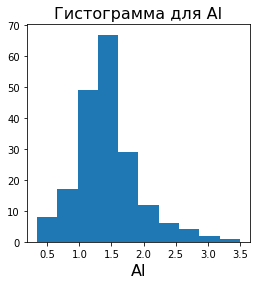

In [59]:
col = 'Al'

fig, ax = plt.subplots(figsize=(4,4))

ax.hist(data[col],bins=10)
ax.set_xlabel(col,fontsize=16)
ax.set_title('Гистограмма для '+str(col),fontsize=16)

plt.show()

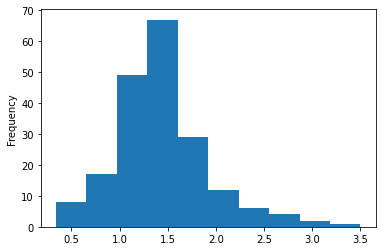

In [56]:
data[col].plot(kind='hist')

<function matplotlib.pyplot.show>

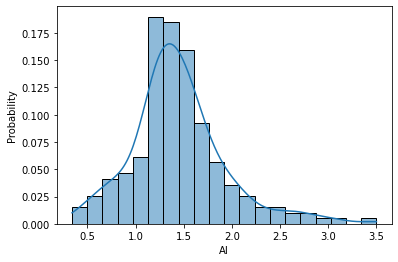

In [69]:
sns.histplot(data=data,x=col,kde=True,stat='probability',bins=20)
plt.show

In [75]:
bar(barplot)
data['Class'].value_counts().index.value

ax.bar(x,y)

NameError: ignored